# Linear Sequential Estimation

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [3]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [4]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [5]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

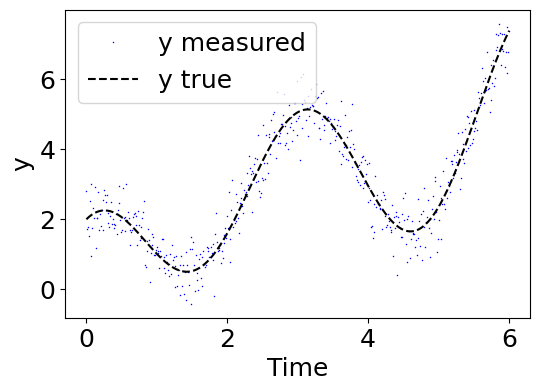

In [6]:
plot_tme(t, y, y_tilde)

# Candidate models

In [7]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [7]:
# assume W=1, one measurement at a time, initialize with a value of xhat and P (error covariance matrix) xhat = random 3 variables; P = 10 * I.

In [39]:
# initial state
x0 = np.array([0, 0, 0]).T


P0 = 10*np.eye(3) # 3, for 3 dimensional, 3x3 I matrix


In [40]:
def update(x_k, P_k, H_kp1, y_kp1, W):
  inv_P_k = np.linalg.inv(P_k)
  inv_P_kp1 = inv_P_k + H_kp1.T@W@H_kp1 # equation 3
  P_kp1 = np.linalg.inv(inv_P_kp1)
  x_kp1 = x_k + P_kp1@H_kp1.T@W@(y_kp1-H_kp1@x_k) # equation 1
  return x_kp1, P_kp1 # x and P for the next timestep

In [11]:
model_1_H.shape

(500, 3)

In [14]:
y_tilde[5,:].shape

(1,)

In [16]:
np.atleast_2d(y_tilde[5,:].shape)

array([[1]])

In [41]:
x_hats = [x0]
Ps = [P0]

for i in range(y_tilde.shape[0]): # 500 measurements, run one measurement at a time
  x_k = x_hats[-1]
  P_k = Ps[-1]

  W = np.array([[1]])
  H_kp1 = np.atleast_2d(model_1_H[i,:])
  y_kp1 = np.atleast_2d(y_tilde[i,:])
  x_kp1, P_kp1 = update(x_k, P_k, H_kp1, y_kp1, W)
  print(x_kp1)
  x_hats.append(x_kp1)
  Ps.append(P_kp1)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [2.55648426 2.55648426 2.55648426]]
[[-0.05272674 -0.05272674 -0.05272674]
 [-0.05272547 -0.05272547 -0.05272547]
 [ 2.15795343  2.15795343  2.15795343]]
[[-0.09857711 -0.09857711 -0.09857711]
 [-0.09857038 -0.09857038 -0.09857038]
 [ 2.03928347  2.03928347  2.03928347]]
[[-0.18913948 -0.18913948 -0.18913948]
 [-0.1891068  -0.1891068  -0.1891068 ]
 [ 1.92145922  1.92145922  1.92145922]]
[[-0.03974258 -0.03974258 -0.03974258]
 [-0.03978882 -0.03978882 -0.03978882]
 [ 2.03685133  2.03685133  2.03685133]]
[[-0.3499844  -0.3499844  -0.3499844 ]
 [-0.34976785 -0.34976785 -0.34976785]
 [ 1.88139048  1.88139048  1.88139048]]
[[0.053127   0.053127   0.053127  ]
 [0.05284074 0.05284074 0.05284074]
 [2.01901916 2.01901916 2.01901916]]
[[-0.03875618 -0.03875618 -0.03875618]
 [-0.03888296 -0.03888296 -0.03888296]
 [ 1.99714949  1.99714949  1.99714949]]
[[0.11261011 0.11261011 0.11261011]
 [0.11213198 0.11213198 0.11213198]
 [

In [43]:
X = np.hstack(x_hats)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

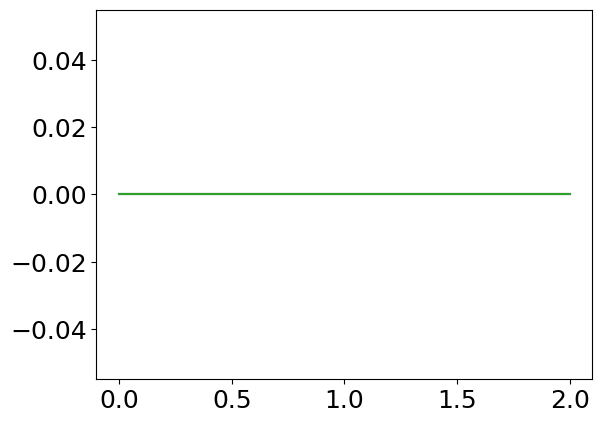

In [44]:
plt.plot(X[0, :])
plt.plot(X[1, :])
plt.plot(X[2,:])